In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, f1_score, recall_score
import statsmodels.api as sm

In [ ]:
dt =  pd.read_csv('Admission_Predict.csv')
dt.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
dt.dtypes

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [ ]:
dt = dt.drop("Serial No.",axis=1)

In [ ]:
dt.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
dt["Admission"] = dt["Chance of Admit "]>0.85

In [ ]:
dt = dt.drop("Chance of Admit ",axis=1)

In [ ]:
dt = dt.replace(to_replace = [True,False],value = [1,0])

<ipython-input-43-835dc8f063b2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt = dt.replace(to_replace = [True,False],value = [1,0])


In [ ]:
dt.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


<Axes: xlabel='University Rating', ylabel='GRE Score'>

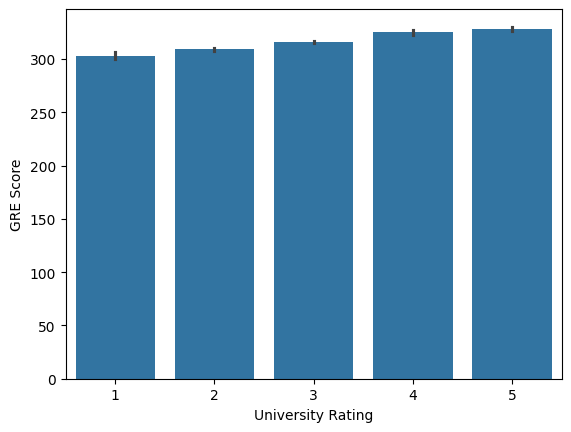

In [ ]:
sns.barplot(x='University Rating', y='GRE Score', data=dt)



<Axes: xlabel='Admission', ylabel='CGPA'>

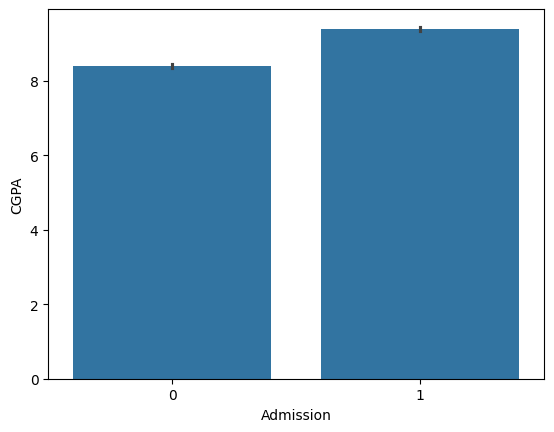

In [ ]:
sns.barplot(x='Admission', y='CGPA', data=dt)

<Axes: xlabel='CGPA', ylabel='Count'>

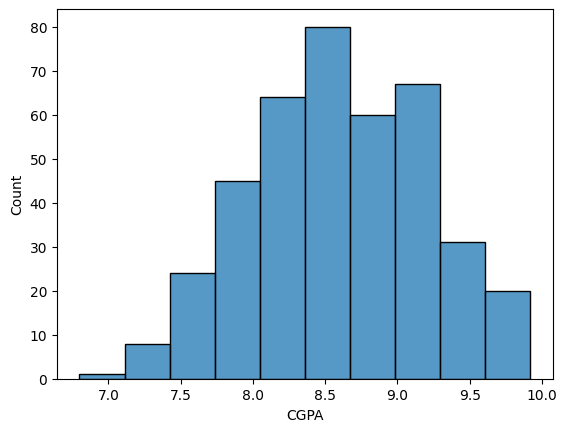

In [ ]:
sns.histplot(dt['CGPA'], bins=10)

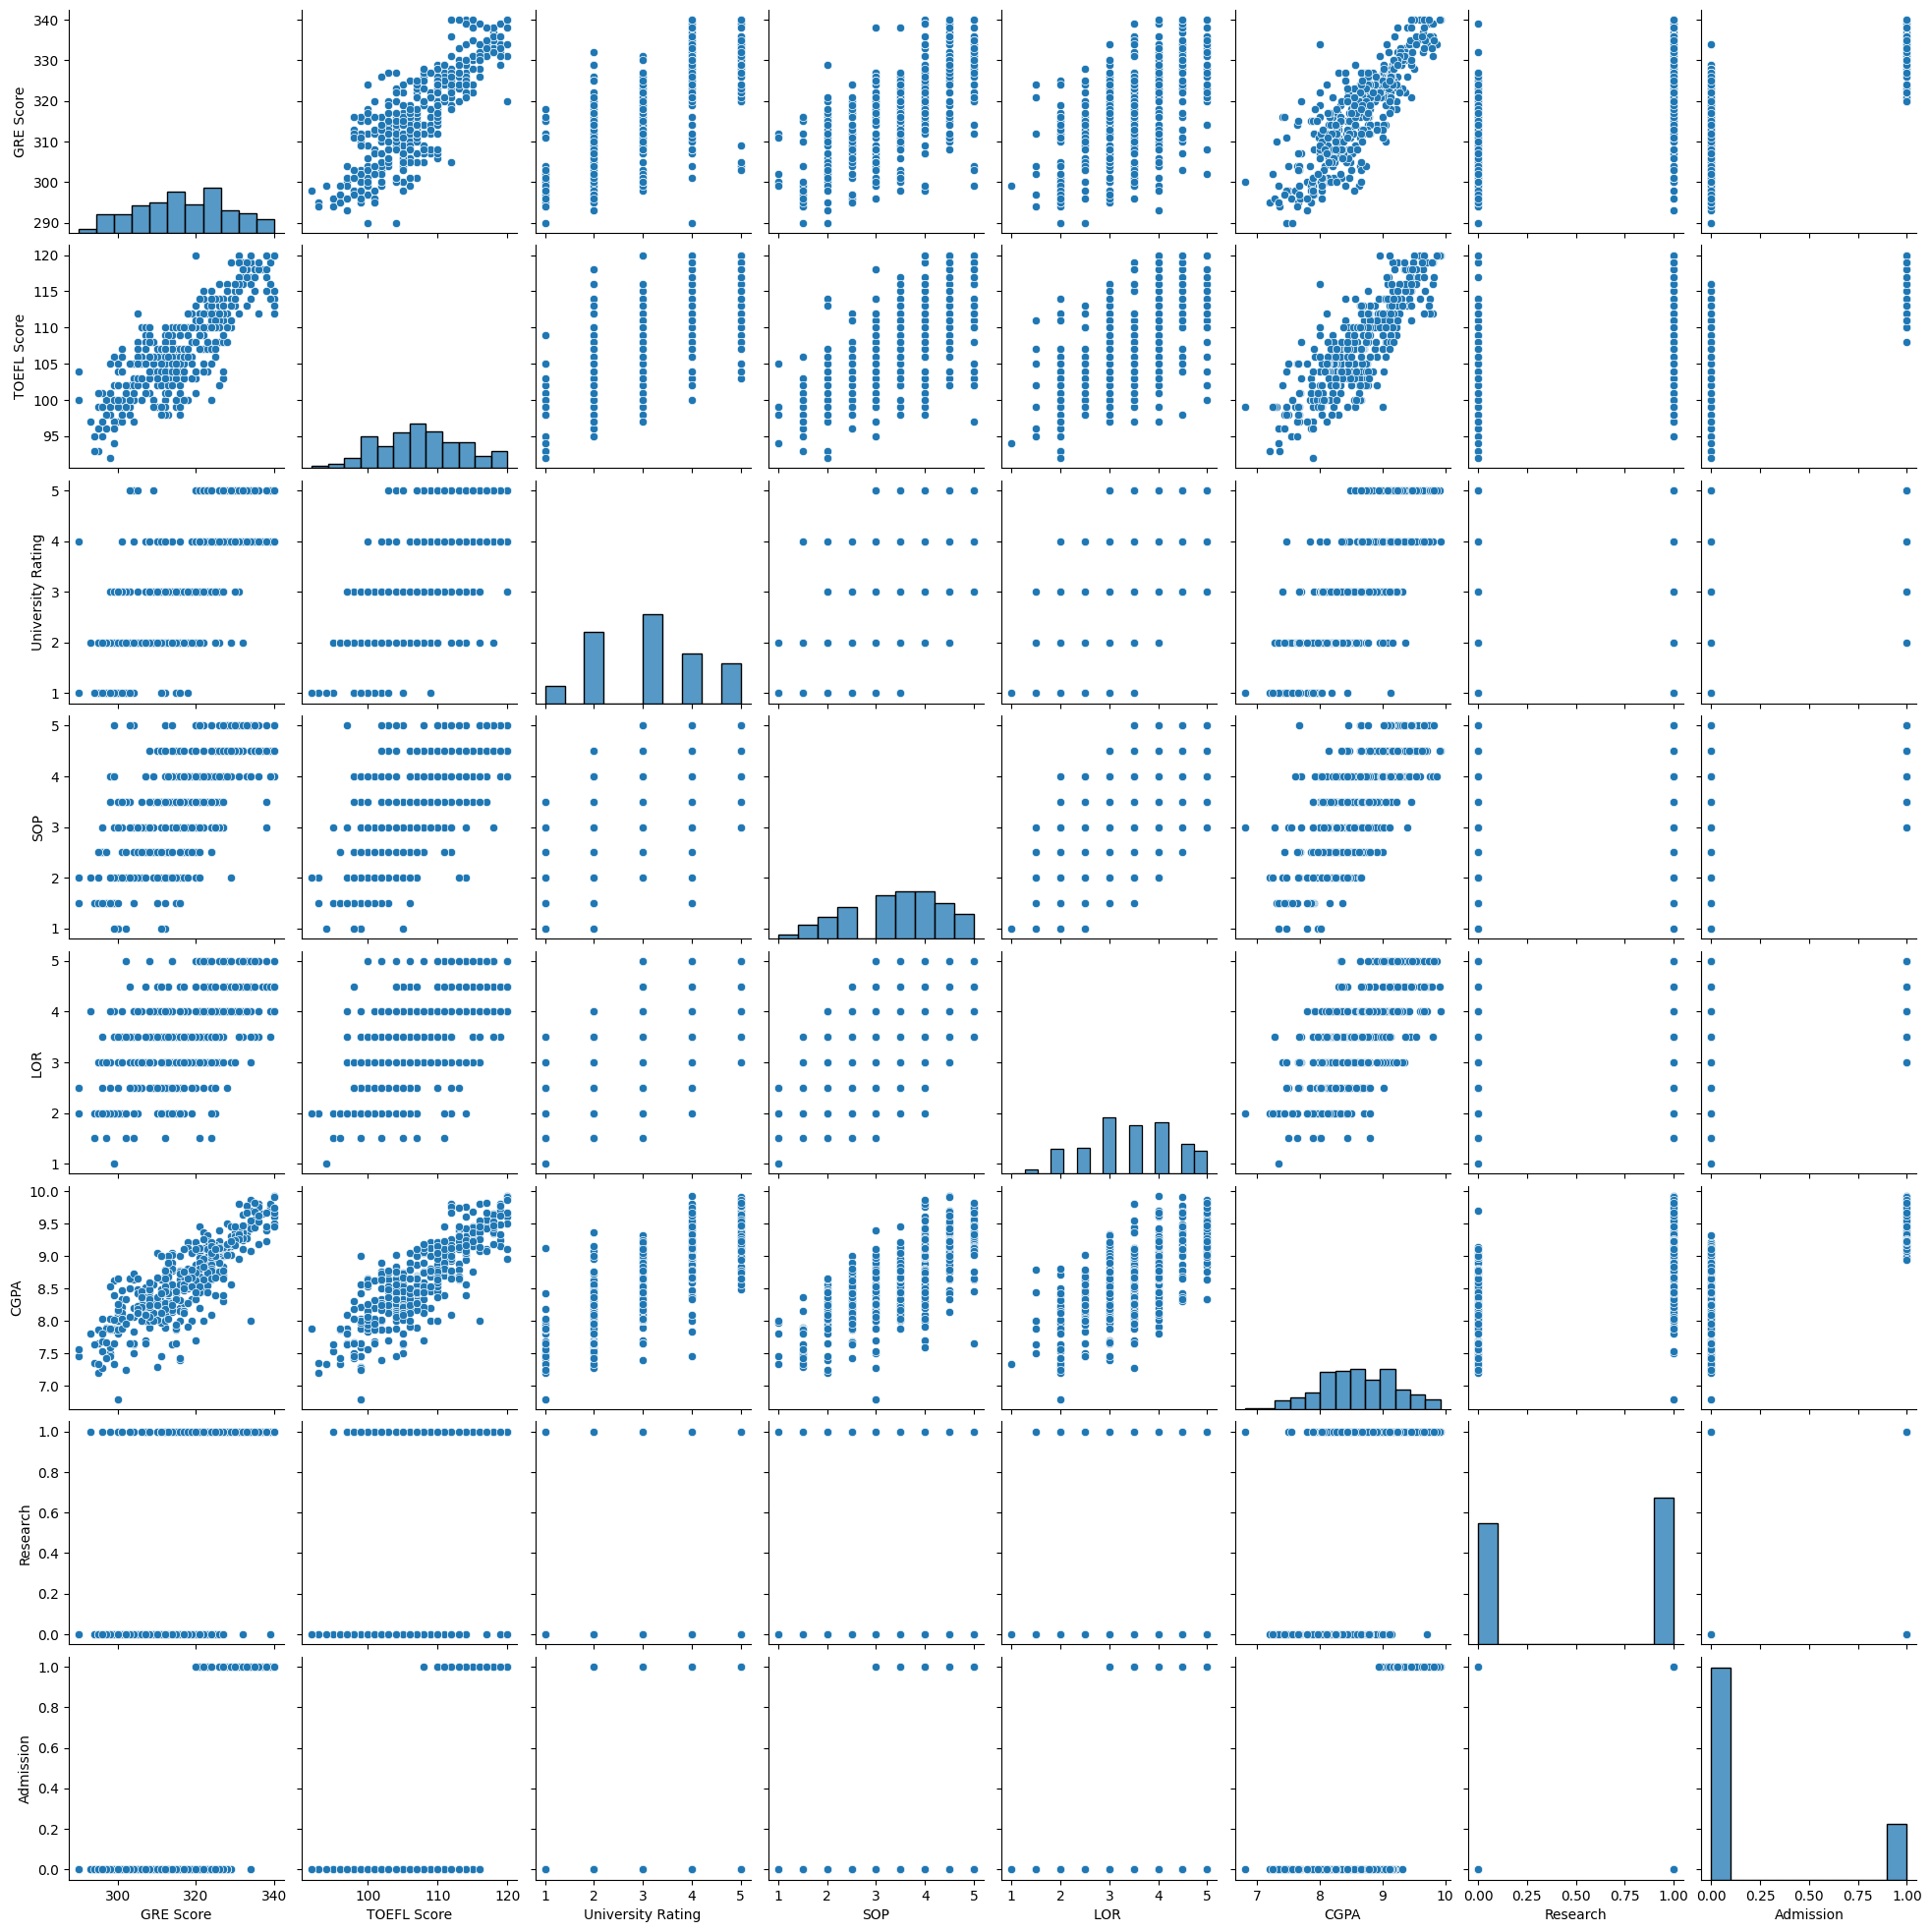

In [ ]:
sns.pairplot(dt)

In [ ]:
x = dt.drop("Admission",axis=1)

In [ ]:
y = dt["Admission"]

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25)

In [ ]:
train_x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
85,319,103,4,4.5,3.5,8.66,0
64,325,111,3,3.0,3.5,8.70,0
290,307,105,2,2.5,3.0,7.65,0
308,312,108,3,3.5,3.0,8.53,0
192,322,114,5,4.5,4.0,8.94,1
...,...,...,...,...,...,...,...
203,334,120,5,4.0,5.0,9.87,1
166,302,102,3,3.5,5.0,8.33,0
292,302,99,2,1.0,2.0,7.97,0
263,324,111,3,2.5,1.5,8.79,1


In [ ]:
test_x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
359,321,107,2,2.0,1.5,8.44,0
162,318,109,3,3.0,3.0,8.50,0
136,312,103,3,5.0,4.0,8.45,0
7,308,101,2,3.0,4.0,7.90,0
351,325,110,4,3.5,4.0,8.67,1
...,...,...,...,...,...,...,...
149,311,106,2,3.5,3.0,8.26,1
217,321,109,4,4.0,4.0,9.13,1
388,296,97,2,1.5,2.0,7.80,0
343,305,103,2,2.5,3.5,8.13,0


In [ ]:
train_y

,Admission
85,0
64,0
290,0
308,0
192,1
...,...
203,1
166,0
292,0
263,0


In [ ]:
test_y

,Admission
359,0
162,0
136,0
7,0
351,0
...,...
149,0
217,0
388,0
343,0


In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc = dtc.fit(train_x, train_y)

[Text(0.5833333333333334, 0.95, 'x[5] <= 9.185\ngini = 0.324\nsamples = 300\nvalue = [239, 61]'),
 Text(0.5, 0.85, 'x[5] <= 9.05\ngini = 0.084\nsamples = 250\nvalue = [239, 11]'),
 Text(0.5416666666666667, 0.8999999999999999, 'True  '),
 Text(0.16666666666666666, 0.75, 'x[2] <= 4.5\ngini = 0.018\nsamples = 224\nvalue = [222, 2]'),
 Text(0.08333333333333333, 0.65, 'gini = 0.0\nsamples = 214\nvalue = [214, 0]'),
 Text(0.25, 0.65, 'x[5] <= 8.89\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.16666666666666666, 0.55, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.3333333333333333, 0.55, 'x[6] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.25, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4166666666666667, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.75, 'x[2] <= 4.5\ngini = 0.453\nsamples = 26\nvalue = [17, 9]'),
 Text(0.75, 0.65, 'x[1] <= 117.5\ngini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(0.6666666666666666, 0.

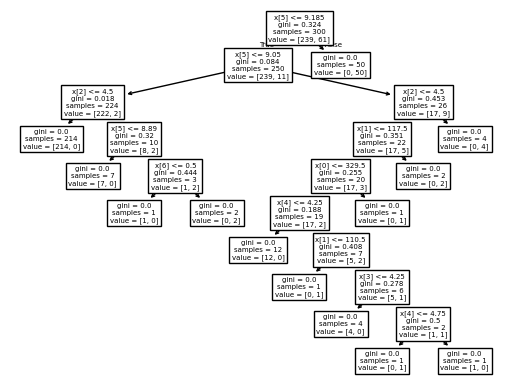

In [ ]:
plot_tree(dtc)
# plt.savefig("tree2.pdf")

In [ ]:
feature_importances = dtc.feature_importances_

# Step 5: Find the feature with the maximum importance (information gain)
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order

# Step 3: Get the feature names sorted by information gain
sorted_feature_names = x.columns[sorted_indices]

# Step 4: Display the features along with their information gain values
print("Features sorted by information gain (importance):")
for idx in sorted_indices:
    print(f"{x.columns[idx]}: {feature_importances[idx]:.4f}")



imp = dtc.feature_importances_
highest_gain = x.columns[imp.argmax()]

Features sorted by information gain (importance):
CGPA: 0.8573
University Rating: 0.0495
TOEFL Score: 0.0393
LOR : 0.0177
GRE Score: 0.0156
Research: 0.0137
SOP: 0.0069


In [ ]:
p1 = dtc.predict(train_x)

In [ ]:
confusion_matrix(train_y,p1)

array([[239,   0],
       [  0,  61]])

In [ ]:
accuracy_score(train_y,p1)

1.0

In [ ]:
pred_y = dtc.predict(test_x)
pred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
confusion_matrix(test_y,pred_y)

array([[75,  3],
       [ 2, 20]])

In [ ]:
accuracy_score(test_y,pred_y)

0.95

In [ ]:
precision_score(test_y,pred_y)

0.8695652173913043

In [ ]:
recall_score(test_y,pred_y)

0.9090909090909091

In [ ]:
predict1 = dtc.predict([[330 ,116 ,4 ,5.0 ,4.5 ,9.45,1 ]])
predict1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
if predict1[0] == 1:
    print("Admitted")
else:
    print("Not Admitted")

Admitted
